The dataset this notebook uses:

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Go check it out !


In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "olist_customers_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "olistbr/brazilian-ecommerce",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-20-156796349.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


# Main task:
Analyze sales performance by product category , based on the data in "olist_orders_dataset.csv", "olist_order_items_dataset.csv", and "olist_products_dataset.csv".

### Subtask:
## Load data

Load the necessary CSV files (`olist_orders_dataset.csv`, `olist_order_items_dataset.csv`, `olist_products_dataset.csv`) into pandas DataFrames.



Load the specified CSV files into pandas DataFrames and display the head of each to verify the loading process.



In [ ]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the files you'd like to load
orders_file_path = "olist_orders_dataset.csv"
order_items_file_path = "olist_order_items_dataset.csv"
products_file_path = "olist_products_dataset.csv"

# Load the latest version of each file
orders_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "olistbr/brazilian-ecommerce",
  orders_file_path,
)

order_items_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "olistbr/brazilian-ecommerce",
  order_items_file_path,
)

products_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "olistbr/brazilian-ecommerce",
  products_file_path,
)


print("First 5 records of orders_df:")
display(orders_df.head())

print("\nFirst 5 records of order_items_df:")
display(order_items_df.head())

print("\nFirst 5 records of products_df:")
display(products_df.head())

/tmp/ipython-input-21-1498776526.py:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  orders_df = kagglehub.load_dataset(
/tmp/ipython-input-21-1498776526.py:17: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  order_items_df = kagglehub.load_dataset(
/tmp/ipython-input-21-1498776526.py:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  products_df = kagglehub.load_dataset(


First 5 records of orders_df:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



First 5 records of order_items_df:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



First 5 records of products_df:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Subtask:

## Database setup

Create an in-memory SQLite database and load the dataframes into tables.


**Reasoning**:
Import the necessary library and create an in-memory SQLite database connection, then load the dataframes into tables.



In [ ]:
import sqlite3

# Create an in-memory SQLite database connection
conn = sqlite3.connect(':memory:')

# Load dataframes into tables
orders_df.to_sql('orders', conn, index=False)
order_items_df.to_sql('order_items', conn, index=False)
products_df.to_sql('products', conn, index=False)

32951

## Sql query

### Subtask:
Write and execute a SQL query to join the tables and analyze sales performance by product category.


In [ ]:
sql_query = """
SELECT
    p.product_category_name,
    SUM(oi.price) AS total_sales
FROM order_items oi
JOIN orders o ON oi.order_id = o.order_id
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY total_sales DESC;
"""

sales_by_category_df = pd.read_sql_query(sql_query, conn)
display(sales_by_category_df.head())

,product_category_name,total_sales
0,beleza_saude,1258681.34
1,relogios_presentes,1205005.68
2,cama_mesa_banho,1036988.68
3,esporte_lazer,988048.97
4,informatica_acessorios,911954.32


What is the query doing step-by-step?
It starts from order_items (oi), which holds item-level sales details.

Joins with orders (o) on order_id to connect each item to its order (in this query, the join doesn’t add filtering but ensures data integrity or could be used if you want to filter by order info).

Joins with products (p) on product_id to get the product category for each item.

Then groups by product category and sums the prices of all items sold in that category (SUM(oi.price)).

Finally, orders the results by total sales in descending order.

## Display results

### Subtask:
Display the results of the SQL query.



Display the sales_by_category_df DataFrame to show the total sales per product category as requested in the instructions.



In [ ]:
display(sales_by_category_df)

,product_category_name,total_sales
0,beleza_saude,1258681.34
1,relogios_presentes,1205005.68
2,cama_mesa_banho,1036988.68
3,esporte_lazer,988048.97
4,informatica_acessorios,911954.32
...,...,...
69,flores,1110.04
70,casa_conforto_2,760.27
71,cds_dvds_musicais,730.00
72,fashion_roupa_infanto_juvenil,569.85


## Summary

### Subtask:
Summarize the findings from the analysis.


Summarize the key insights from the `sales_by_category_df` to provide a clear understanding of the sales performance across different product categories.

Based on the sales performance analysis by product category, we can observe the following:

*   The top-selling product categories are 'beleza\_saude', 'relogios\_presentes', and 'cama\_mesa\_banho'.
*   There is a significant variation in total sales across different product categories, ranging from over 1.2 million to just a few hundred.
*   Several categories have relatively low sales, indicating potential areas for review or further investigation.



x-aixs is the index of freight_percentage_df


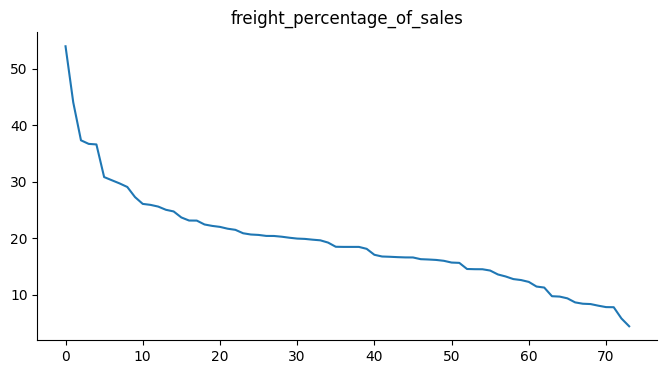

In [ ]:
# @title freight_percentage_of_sales

from matplotlib import pyplot as plt
freight_percentage_df['freight_percentage_of_sales'].plot(kind='line', figsize=(8, 4), title='freight_percentage_of_sales')
plt.gca().spines[['top', 'right']].set_visible(False)
print("x-aixs is the index of freight_percentage_df")

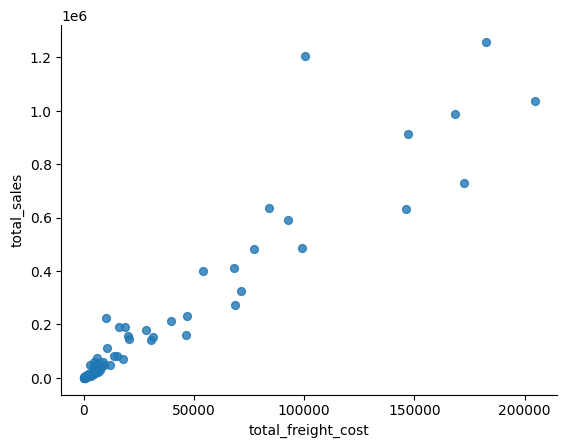

In [ ]:
# @title total_freight_cost vs total_sales

from matplotlib import pyplot as plt
freight_percentage_df.plot(kind='scatter', x='total_freight_cost', y='total_sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)